In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Валидация данных

In [ ]:
df0 = pd.read_excel('/content/geo_data_0.xlsx')
df0 = df0.dropna()

In [ ]:
df1 = pd.read_excel('/content/geo_data_1.xlsx')
df1 = df1.dropna()

In [ ]:
df2 = pd.read_excel('/content/geo_data_2.xlsx')
df2 = df2.dropna()

In [ ]:
df_all = pd.concat([df0, df1, df2])

In [ ]:
def check_df(df):
  print(f'data frame shape:{df.shape}')
  print(df.dtypes)

  # отбор числовых колонок
  df_numeric = df.select_dtypes(include=[np.number])
  numeric_cols = df_numeric.columns.values
  print(f'numeric columns: {numeric_cols}')

  # отбор нечисловых колонок
  df_non_numeric = df.select_dtypes(exclude=[np.number])
  non_numeric_cols = df_non_numeric.columns.values
  print(f'non numeric columns: {non_numeric_cols}')

In [ ]:
check_df(df_all)

data frame shape:(300000, 5)
id          object
f0         float64
f1         float64
f2         float64
product    float64
dtype: object
numeric columns: ['f0' 'f1' 'f2' 'product']
non numeric columns: ['id']


# Корреляционная матрица

In [ ]:

def correlation_matrix(df):
  print(df.head())
  df = df[['f0', 'f1', 'f2', 'product']]

  corr_matrix = df.corr()
  print(corr_matrix)

  plt.figure(figsize=(10, 8))


  sns.heatmap(corr_matrix, annot=True, cmap='PiYG', center=0, linewidths=1, linecolor='black')

  plt.title('Корреляционная матрица для набора данных о добыче нефти в 3-х регионах')
  plt.show()

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
               f0        f1        f2   product
f0       1.000000  0.085495 -0.000849 -0.030439
f1       0.085495  1.000000  0.000002  0.137210
f2      -0.000849  0.000002  1.000000  0.533554
product -0.030439  0.137210  0.533554  1.000000


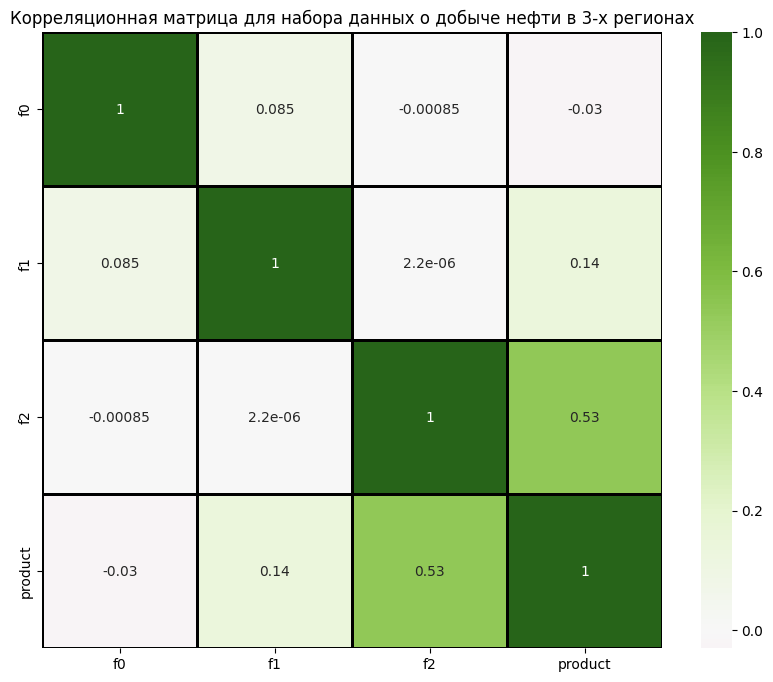

In [ ]:
correlation_matrix(df_all)

# **Обучение модели и составление прогнозов**

# **первый регион**


In [ ]:
from sklearn.model_selection import train_test_split

#разделение данных
X = df0[['f0', 'f1', 'f2']]
Y = df0[['product']]

# Разделите данные на обучающие (75%) и проверочные (25%).
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.25, random_state=42)

print(X_train.shape, X_val.shape)

(75000, 3) (25000, 3)


In [ ]:
# Создание модели линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Обучить модель с помощью обучающих данных
model.fit(X_train, Y_train)

#Делайте прогнозы на основе данных проверки
Y_pred = model.predict(X_val)

#Сохраняйте прогнозные и фактические значения
Y_pred = np.ravel(Y_pred)
Y_val = np.ravel(Y_val)
result_prediction0=pd.DataFrame({'Prediction':Y_pred, 'Actual':Y_val})

In [ ]:
#Вычислите средние прогнозируемые и фактические значения
mean_pred = result_prediction0['Prediction'].mean()
mean_actual = result_prediction0['Actual'].mean()

#Оценка модели с помощью RMSE
rmse = np.sqrt(mean_squared_error(Y_val, Y_pred))


In [ ]:
print("mean prediction:", mean_pred)
print("mean actual:", mean_actual)
print(f"RMSE: {rmse}")

mean prediction: 92.3987999065777
mean actual: 92.32595637084387
RMSE: 37.756600350261685


In [ ]:
print("Прогнозируемые и фактические значения по данным валидации:")
print(result_prediction0.head())

Прогнозируемые и фактические значения по данным валидации:
   Prediction      Actual
0  101.901017  122.073350
1   78.217774   48.738540
2  115.266901  131.338088
3  105.618618   88.327757
4   97.980185   36.959266


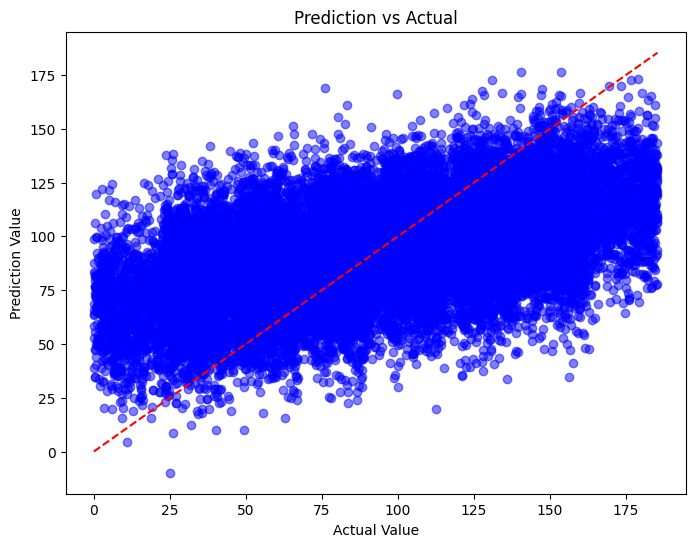

In [ ]:
import matplotlib.pyplot as plt

# Сюжетное предсказание против фактического
plt.figure(figsize=(8,6))
plt.scatter(result_prediction0['Actual'], result_prediction0['Prediction'], color='blue', alpha=0.5)
plt.plot([min(result_prediction0['Actual']), max(result_prediction0['Actual'])],
         [min(result_prediction0['Actual']), max(result_prediction0['Actual'])], color='red', linestyle='--')
plt.title('Prediction vs Actual')
plt.xlabel('Actual Value')
plt.ylabel('Prediction Value')
plt.show()

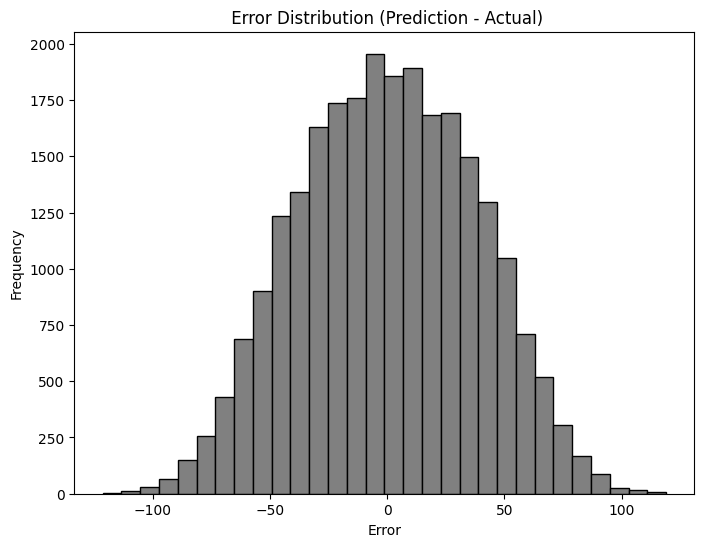

In [ ]:
#  Вычислить ошибку
error = result_prediction0['Prediction'] - result_prediction0['Actual']

# Ошибка гистограммы
plt.figure(figsize=(8,6))
plt.hist(error, bins=30, color='gray', edgecolor='black')
plt.title(' Error Distribution (Prediction - Actual)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


# **второй регион**



In [ ]:
from sklearn.model_selection import train_test_split

#разделение данных
X1 = df1[['f0', 'f1', 'f2']]
Y1 = df1[['product']]

# Разделите данные на обучающие (75%) и проверочные (25%).
X_train1, X_val1, Y_train1, Y_val1 = train_test_split(X1,Y1, test_size=0.25, random_state=42)

print(X_train1.shape, X_val1.shape)

(75000, 3) (25000, 3)


In [ ]:
# Создание модели линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Обучить модель с помощью обучающих данных
model.fit(X_train1, Y_train1)

#Делайте прогнозы на основе данных проверки
Y_pred1 = model.predict(X_val1)

#Сохраняйте прогнозные и фактические значения
Y_pred1 = np.ravel(Y_pred1)
Y_val1 = np.ravel(Y_val1)
result_prediction1=pd.DataFrame({'Prediction':Y_pred1, 'Actual':Y_val1})

In [ ]:
#Вычислите средние прогнозируемые и фактические значения
mean_pred1 = result_prediction1['Prediction'].mean()
mean_actual1 = result_prediction1['Actual'].mean()

#Оценка модели с помощью RMSE
rmse1 = np.sqrt(mean_squared_error(Y_val1, Y_pred1))

In [ ]:
print("mean prediction1:", mean_pred1)
print("mean actual1:", mean_actual1)
print(f"RMSE1: {rmse1}")

mean prediction1: 68.71287803913762
mean actual1: 68.72538074722745
RMSE1: 0.890280100102884


In [ ]:
print("Прогнозируемые и фактические значения по данным валидации:")
print(result_prediction1.head())

Прогнозируемые и фактические значения по данным валидации:
   Prediction      Actual
0    0.844738    0.000000
1   52.921612   53.906522
2  135.110385  134.766305
3  109.494863  107.813044
4   -0.047292    0.000000


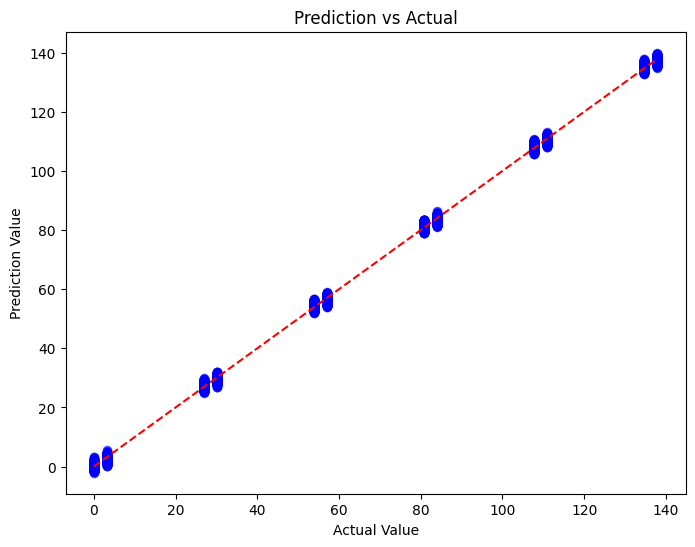

In [ ]:
import matplotlib.pyplot as plt

# Сюжетное предсказание против фактического
plt.figure(figsize=(8,6))
plt.scatter(result_prediction1['Actual'], result_prediction1['Prediction'], color='blue', alpha=0.5)
plt.plot([min(result_prediction1['Actual']), max(result_prediction1['Actual'])],
         [min(result_prediction1['Actual']), max(result_prediction1['Actual'])], color='red', linestyle='--')
plt.title('Prediction vs Actual')
plt.xlabel('Actual Value')
plt.ylabel('Prediction Value')
plt.show()

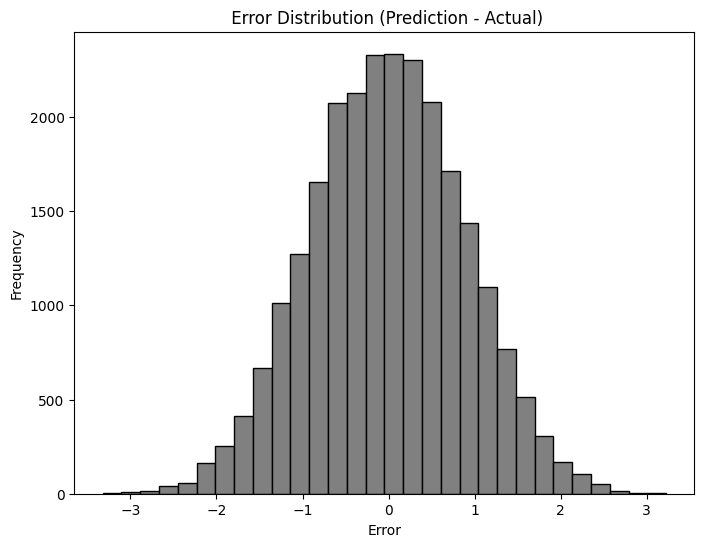

In [ ]:
#  Вычислить ошибку
error = result_prediction1['Prediction'] - result_prediction1['Actual']

# Ошибка гистограммы
plt.figure(figsize=(8,6))
plt.hist(error, bins=30, color='gray', edgecolor='black')
plt.title(' Error Distribution (Prediction - Actual)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


# **третий регион**

In [ ]:
from sklearn.model_selection import train_test_split

#разделение данных
X2 = df2[['f0', 'f1', 'f2']]
Y2 = df2[['product']]

# Разделите данные на обучающие (75%) и проверочные (25%).
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X2,Y2, test_size=0.25, random_state=42)

print(X_train2.shape, X_val2.shape)

(75000, 3) (25000, 3)


In [ ]:
# Создание модели линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

# Обучить модель с помощью обучающих данных
model.fit(X_train2, Y_train2)

#Делайте прогнозы на основе данных проверки
Y_pred2 = model.predict(X_val2)

#Сохраняйте прогнозные и фактические значения
Y_pred2 = np.ravel(Y_pred2)
Y_val2 = np.ravel(Y_val2)
result_prediction2=pd.DataFrame({'Prediction':Y_pred2, 'Actual':Y_val2})

In [ ]:
#Вычислите средние прогнозируемые и фактические значения
mean_pred2 = result_prediction2['Prediction'].mean()
mean_actual2 = result_prediction2['Actual'].mean()

#Оценка модели с помощью RMSE
rmse2 = np.sqrt(mean_squared_error(Y_val2, Y_pred2))

In [ ]:
print("mean prediction2:", mean_pred2)
print("mean actual2:", mean_actual2)
print(f"RMSE: {rmse2}")

mean prediction2: 94.77102387765939
mean actual2: 95.15099907171961
RMSE: 40.14587231134218


In [ ]:
print("Прогнозируемые и фактические значения по данным валидации:")
print(result_prediction2.head())

Прогнозируемые и фактические значения по данным валидации:
   Prediction      Actual
0   98.301916  117.441301
1  101.592461   47.841249
2   52.449099   45.883483
3  109.922127  139.014608
4   72.411847   84.004276


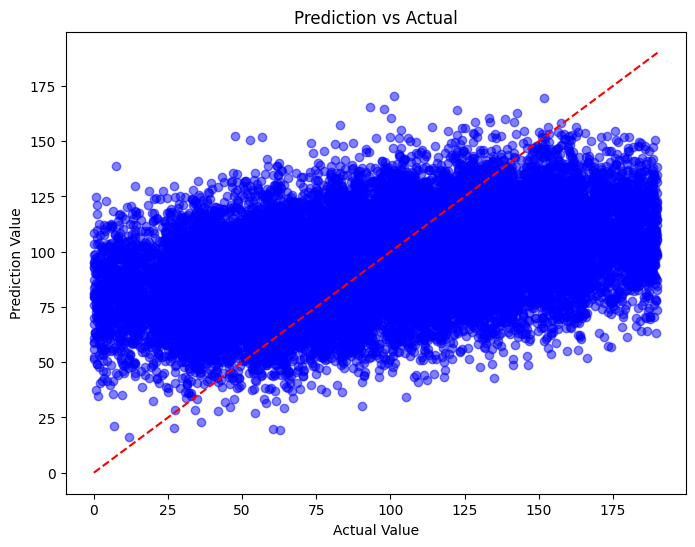

In [ ]:
import matplotlib.pyplot as plt

# Сюжетное предсказание против фактического
plt.figure(figsize=(8,6))
plt.scatter(result_prediction2['Actual'], result_prediction2['Prediction'], color='blue', alpha=0.5)
plt.plot([min(result_prediction1['Actual']), max(result_prediction2['Actual'])],
         [min(result_prediction2['Actual']), max(result_prediction2['Actual'])], color='red', linestyle='--')
plt.title('Prediction vs Actual')
plt.xlabel('Actual Value')
plt.ylabel('Prediction Value')
plt.show()

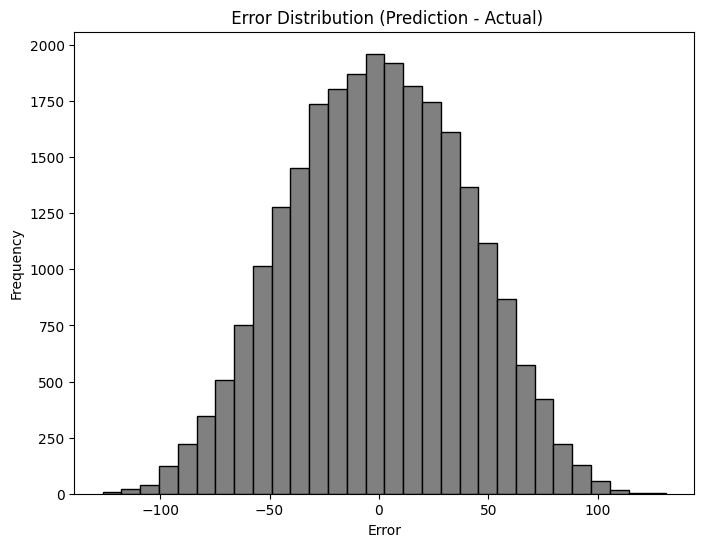

In [ ]:
#  Вычислить ошибку
error = result_prediction2['Prediction'] - result_prediction2['Actual']

# Ошибка гистограммы
plt.figure(figsize=(8,6))
plt.hist(error, bins=30, color='gray', edgecolor='black')
plt.title(' Error Distribution (Prediction - Actual)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

# **Расчёт прибыли**


In [ ]:
budget = 10 ** 10 # Бюджет на разработку скважин
count_objects = 200 # Кол-во скважин
proceeds = 450000 # Доход с каждой единицы продукта
# Достаточный объём сырья для безубыточной разработки новой скважины
sufficient_volume_product = round(budget / (count_objects * proceeds), 2)
# Средний запас сырья в каждом регионе
mean_pred_region_1 = Y_pred.mean()
mean_pred_region_2 = Y_pred1.mean()
mean_pred_region_3 = Y_pred2.mean()

In [ ]:
print(f'Достаточный объём сырья для безубыточной разработки новой скважины: {sufficient_volume_product}')
print(f'Средний объём сырья в первом регионе: {mean_pred_region_1}')
print(f'Средний объём сырья во втором регионе: {mean_pred_region_2}')
print(f'Средний объём сырья в третьем регионе: {mean_pred_region_3}')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11
Средний объём сырья в первом регионе: 92.3987999065777
Средний объём сырья во втором регионе: 68.71287803913762
Средний объём сырья в третьем регионе: 94.77102387765939


Как можно заметить, среднее значение объём сырья в каждом регионе
меньше достаточного объём для безубыточной разработки скважин.
Это означает, что нужно из каждого региона выбрать лучшие точки для разработки новых скважин.

Так же можно заметить, что во втором регионе самый низкий средний показатель, а в третьем самый высокий.

In [ ]:
# Выбор 200 лучших точек для скважины в каждом регионе
best_points_region_1 = sorted(Y_pred, reverse=True)[:200]
best_points_region_2 = sorted(Y_pred1, reverse=True)[:200]
best_points_region_3 = sorted(Y_pred2, reverse=True)[:200]
# Сумма объёма сырья для каждого региона
volume_raw_materials_region_1 = sum(best_points_region_1)
volume_raw_materials_region_2 = sum(best_points_region_2)
volume_raw_materials_region_3 = sum(best_points_region_3)
# Рассчёт прибыли с 200 скважин в каждом регионе
proceeds_region_1 = volume_raw_materials_region_1 * proceeds - budget
proceeds_region_2 = volume_raw_materials_region_2 * proceeds - budget
proceeds_region_3 = volume_raw_materials_region_3 * proceeds - budget

In [ ]:
# Проверка, что точка с самым минимальным объёмом сырья из каждого региона прибыльна
print(f'Объём сырья худшей точки из выбранных в первом регионе и сравнение с минимальным оъёмом: {round(best_points_region_1[-1], 2)}, {best_points_region_1[-1] > sufficient_volume_product}')
print(f'Объём сырья худшей точки из выбранных во втором регионе и сравнение с минимальным оъёмом: {round(best_points_region_2[-1], 2)}, {best_points_region_2[-1] > sufficient_volume_product}')
print(f'Объём сырья худшей точки из выбранных в третьем регионе и сравнение с минимальным оъёмом: {round(best_points_region_3[-1], 2)}, {best_points_region_3[-1] > sufficient_volume_product}')
print()
# Прибыль
print(f'Прибыль с первого региона: {round(proceeds_region_1, 2)} рублей')
print(f'Прибыль со второго региона: {round(proceeds_region_2, 2)} рублей')
print(f'Прибыль с тертьего региона: {round(proceeds_region_3, 2)} рублей')

Объём сырья худшей точки из выбранных в первом регионе и сравнение с минимальным оъёмом: 146.87, True
Объём сырья худшей точки из выбранных во втором регионе и сравнение с минимальным оъёмом: 138.42, True
Объём сырья худшей точки из выбранных в третьем регионе и сравнение с минимальным оъёмом: 142.3, True

Прибыль с первого региона: 3896658479.67 рублей
Прибыль со второго региона: 2486938115.0 рублей
Прибыль с тертьего региона: 3377981513.71 рублей


# Оценка рисков

In [ ]:
def take_profit(data):
  cash = 10**10
  n = 200
  price = 450000
  min_product = round(cash / price / n, 3)
  return round(data.sort_values(by='Prediction', ascending=False).head(200)['Actual'].sum()*price - cash)

In [ ]:
from numpy.random import RandomState

def get_risks(data):
    size = data.shape[0]
    indexes = pd.Series(range(size))
    profit = []
    risk = 0
    state = RandomState(12345)

    for i in range(1000):
        subsample = indexes.sample(frac=500/size, replace=True, random_state=state)
        profit.append(take_profit(data.loc[subsample, :]))
        if take_profit(data.loc[subsample, :]) < 0:
            risk += 1
    profit = pd.Series(profit)

    print('Средняя прибыль:', round(profit.mean()))
    print('95-ый доверительный интервал: от', round(profit.quantile(0.025)), 'до', round(profit.quantile(0.975)))
    print('Риск (вероятность убытка):', risk/1000)

In [ ]:
# Посчитаем основные параметры для трёх регионов
print('1-й регион: ')
get_risks(result_prediction0)
print()
print('2-ой регион: ')
get_risks(result_prediction1)
print()
print('3-й регион: ')
get_risks(result_prediction2)

1-й регион: 
Средняя прибыль: 406278783
95-ый доверительный интервал: от -117742136 до 911737051
Риск (вероятность убытка): 0.067

2-ой регион: 
Средняя прибыль: 432624132
95-ый доверительный интервал: от 16846175 до 815972527
Риск (вероятность убытка): 0.019

3-й регион: 
Средняя прибыль: 377362192
95-ый доверительный интервал: от -170780417 до 901772131
Риск (вероятность убытка): 0.074
